/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.632e+03, tolerance: 1.745e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

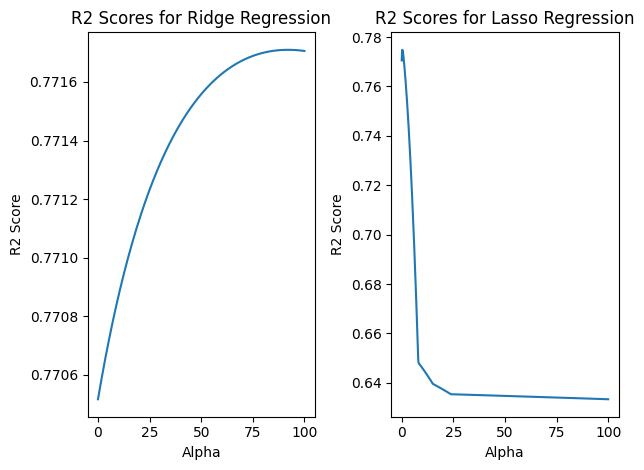

Best R2 (Ridge): 0.7717099457514314, and Best Alphas (Ridge): 91.98396793587175
Best R2 (Lasso): 0.7748227006234505, and Best Alphas (Lasso): 0.20040080160320642


"\nThe optimal alpha for Ridge regression is 91.98, with an R2 score of 0.7717. In case of Lasso regression, the optimal alpha is 0.2004, with an R2 score of 0.7748.\n\nBased on r2 score, both models perform almost similarly, with Lasso slightly outperforming Ridge. Both models explain about 77% of the variance in 'mpg' which is fairly good.\n\nThe optimal alpha values are quite different in case of Ridge and Lasso regression. Ridge needs stronger regularization as indicated by the alpha value of 91.98 compared to 0.2004 of Lasso.\n"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn import linear_model
import seaborn as sns


#Read the data into a pandas DataFrame
data = pd.read_csv('/content/sample_data/Auto.csv')

#Setup multiple regression X and y
df = data[['mpg','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']] #Excluded 'mpg', 'name' and 'origin'
x = df.drop(columns='mpg')
y = df['mpg']

#Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5) #Using 20% data for testing

#Define a range of alpha values
alphas = np.linspace(0, 100, 500)

#Initialize lists to store R2 scores
r2_ridge = []
r2_lasso = []

#Loop through alpha values, compute R2 scores, and append the calculated r2 score to the list
for alpha in alphas:
    #Ridge Regression - training and evaluation
    rr_model = Ridge(alpha=alpha)
    rr_model.fit(x_train, y_train)
    y_predict_rr = rr_model.predict(x_test)
    r2_value_rr = r2_score(y_test, y_predict_rr)
    r2_ridge.append(r2_value_rr)

    #Lasso Regression - training and evaluation
    ls_model = linear_model.Lasso(alpha=alpha)
    ls_model.fit(x_train, y_train)
    y_predict_ls = ls_model.predict(x_test)
    r2_value_ls = r2_score(y_test, y_predict_ls)
    r2_lasso.append(r2_value_ls)

#Plot R2 scores for Ridge and Lasso regression
plt.subplot(1, 2, 1)
plt.plot(alphas, r2_ridge)
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('R2 Scores for Ridge Regression')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(alphas, r2_lasso)
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('R2 Scores for Lasso Regression')
plt.tight_layout()
plt.show()

#Identify the best alpha for Ridge
best_r2_rr = max(r2_ridge)
index = r2_ridge.index(best_r2_rr)
best_alpha_rr = alphas[index]

print(f"Best R2 (Ridge): {best_r2_rr}, and Best Alphas (Ridge): {best_alpha_rr}")

#Identify the best alpha for Lasso
best_r2_ls = max(r2_lasso)
index = r2_lasso.index(best_r2_ls)
best_alpha_ls = alphas[index]

print(f"Best R2 (Lasso): {best_r2_ls}, and Best Alphas (Lasso): {best_alpha_ls}")

"""
The optimal alpha for Ridge regression is 91.98, with an R2 score of 0.7717. In case of Lasso regression, the optimal alpha is 0.2004, with an R2 score of 0.7748.

Based on r2 score, both models perform almost similarly, with Lasso slightly outperforming Ridge. Both models explain about 77% of the variance in 'mpg' which is fairly good.

The optimal alpha values are quite different in case of Ridge and Lasso regression. Ridge needs stronger regularization as indicated by the alpha value of 91.98 compared to 0.2004 of Lasso.
"""